# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Loading Dataset

In [2]:
df = pd.read_csv(r'D:\Programacion\Datasets\airline_passenger_satisfaction\train.csv')

In [5]:
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
df.columns = ['_'.join(x.split()) for x in df.columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  object  
 1   Customer_Type                      103904 non-null  object  
 2   Age                                103904 non-null  int64   
 3   Type_of_Travel                     103904 non-null  object  
 4   Class                              103904 non-null  object  
 5   Flight_Distance                    103904 non-null  int64   
 6   Inflight_wifi_service              103904 non-null  int64   
 7   Departure/Arrival_time_convenient  103904 non-null  int64   
 8   Ease_of_Online_booking             103904 non-null  int64   
 9   Gate_location                      103904 non-null  int64   
 10  Food_and_drink                     103904 non-null  int64   
 11  Online_boarding           

In [ ]:
# Duplicated data
df.duplicated().sum()

In [19]:
# Invalid Values
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(),end='\n\n')

Gender
Female    52727
Male      51177
Name: count, dtype: int64

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64



In [31]:
# Missing
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# EDA

In [4]:
sns.set_style('darkgrid')

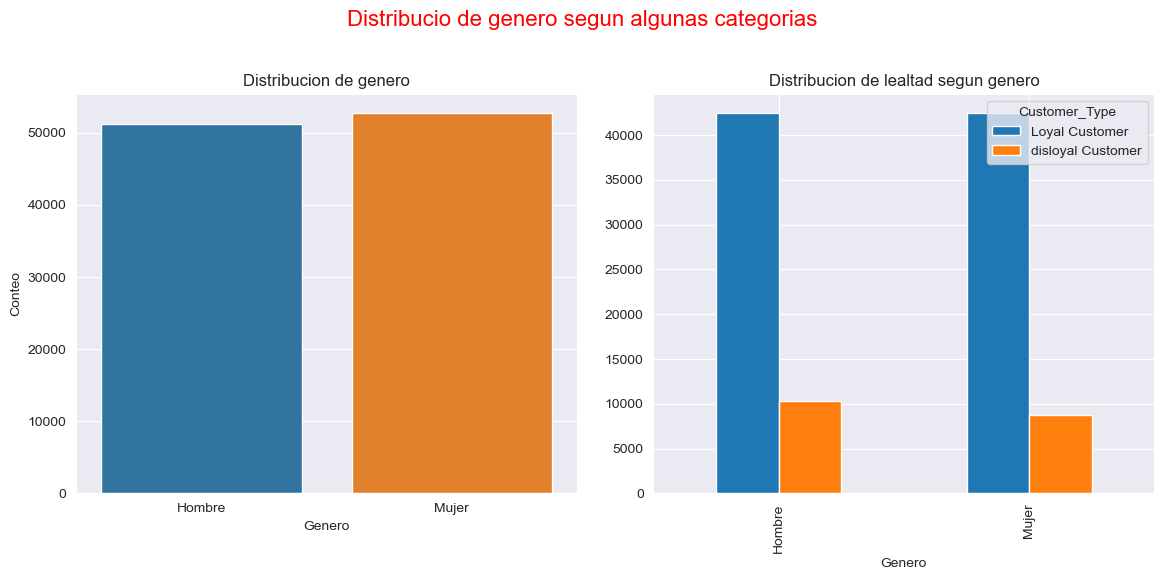

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df.Gender,ax=ax[0])
ax[0].set_ylabel('Conteo')
ax[0].set_title('Distribucion de genero')
ax[0].set_xticks([0,1],['Hombre','Mujer'])
ax[0].set_xlabel('Genero')

df.groupby('Gender')['Customer_Type'].value_counts().unstack().plot.bar(ax=ax[1])
ax[1].set_xticks([0,1],['Hombre','Mujer'])
ax[1].set_xlabel('Genero')
ax[1].set_title('Distribucion de lealtad segun genero')

fig.suptitle('Distribucion de genero segun algunas categorias',color='r',size=16)
plt.tight_layout(pad=2)

C:\Users\Mina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Mina\AppData\Local\Temp\ipykernel_2888\1527204618.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)


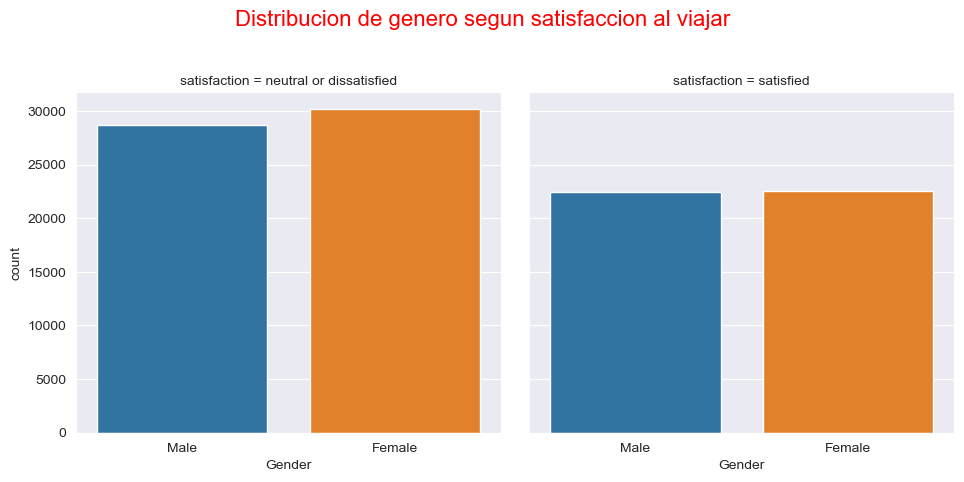

In [58]:
sns.catplot(data=df,
            x='Gender',
            kind='count',col='satisfaction')
plt.suptitle('Distribucion de genero segun satisfaccion al viajar',color='r',size=16)
plt.tight_layout(pad=2)

Text(0.5, 0.98, 'Dispersion de edad por genero')

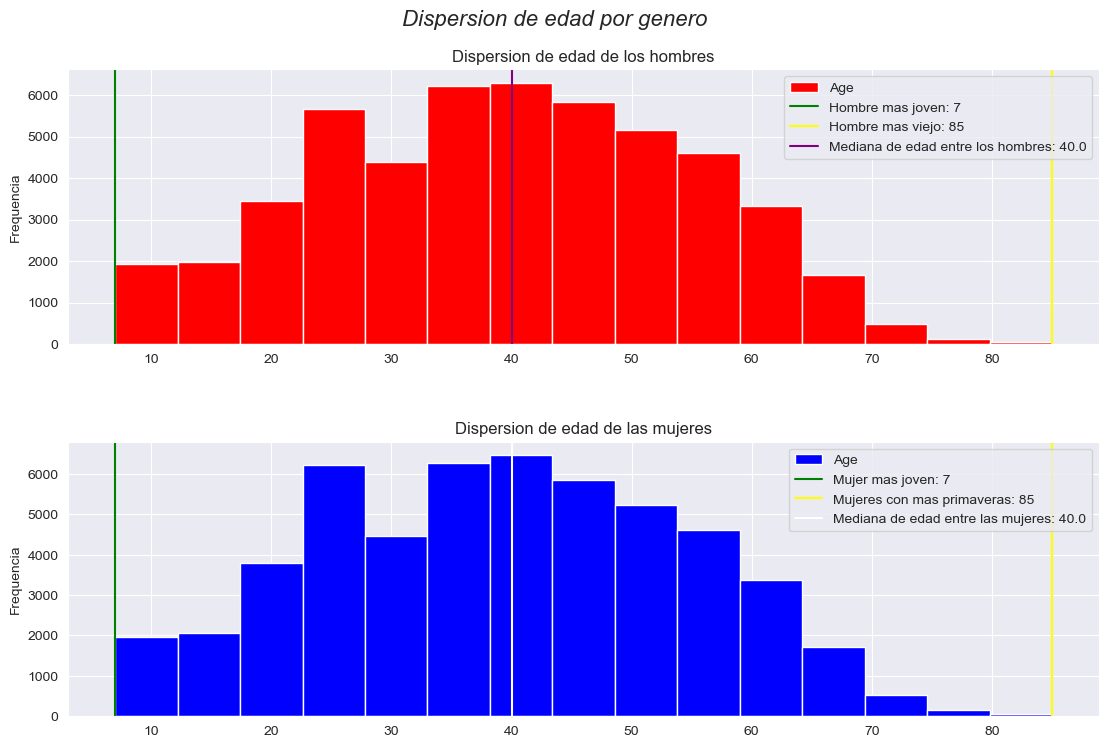

In [57]:
fig0, ax0= plt.subplots(2,1,figsize=(12,8))

men_age = df.loc[df.Gender=='Male', 'Age']
men_age.plot.hist(ax=ax0[0],color='r',bins=15)
ax0[0].set_ylabel('Frequencia')
ax0[0].axvline(x=men_age.min(),color='green',label= f'Hombre mas joven: {men_age.min()}')
ax0[0].axvline(x=men_age.max(),color='yellow',label= f'Hombre mas viejo: {men_age.max()}')
ax0[0].axvline(x=men_age.median(),color='purple',label= f'Mediana de edad entre los hombres: {men_age.median()}')
ax0[0].legend()
ax0[0].set_title('Dispersion de edad de los hombres')

women_age = df.loc[df.Gender=='Female', 'Age']
women_age.plot.hist(ax=ax0[1],color='blue',bins=15)
ax0[1].set_ylabel('Frequencia')
ax0[1].axvline(x=women_age.min(),color='green',label= f'Mujer mas joven: {women_age.min()}')
ax0[1].axvline(x=women_age.max(),color='yellow',label= f'Mujeres con mas primaveras: {women_age.max()}')
ax0[1].axvline(x=women_age.median(),color='white',label= f'Mediana de edad entre las mujeres: {women_age.median()}')
ax0[1].legend()
ax0[1].set_title('Dispersion de edad de las mujeres')

plt.tight_layout(pad=4)
fig0.suptitle('Dispersion de edad por genero',size=16,style='italic')

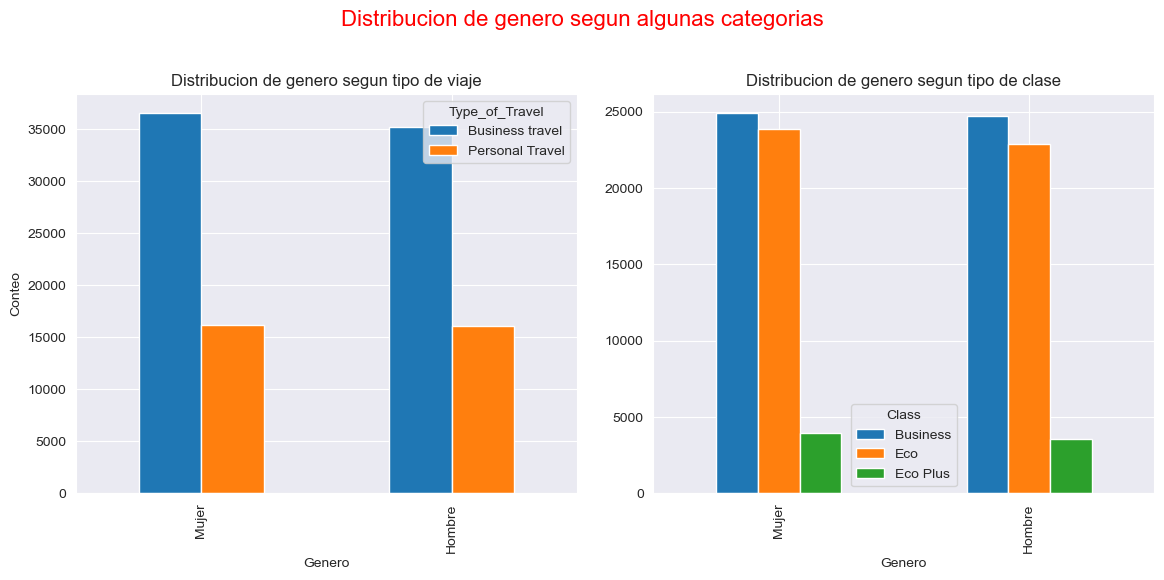

In [63]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
df.groupby('Gender')['Type_of_Travel'].value_counts().unstack().plot.bar(ax=ax[0])
ax[0].set_ylabel('Conteo')
ax[0].set_title('Distribucion de genero segun tipo de viaje')
ax[0].set_xticks([0,1],['Mujer','Hombre'])
ax[0].set_xlabel('Genero')

df.groupby('Gender')['Class'].value_counts().unstack().plot.bar(ax=ax[1])
ax[1].set_title('Distribucion de genero segun tipo de clase')
ax[1].set_xticks([0,1],['Mujer','Hombre'])
ax[1].set_xlabel('Genero')

fig.suptitle('Distribucion de genero segun algunas categorias',color='r',size=16)
plt.tight_layout(pad=2)

Text(0.5, 0.98, 'Analisis sobre Tipo de cliente')

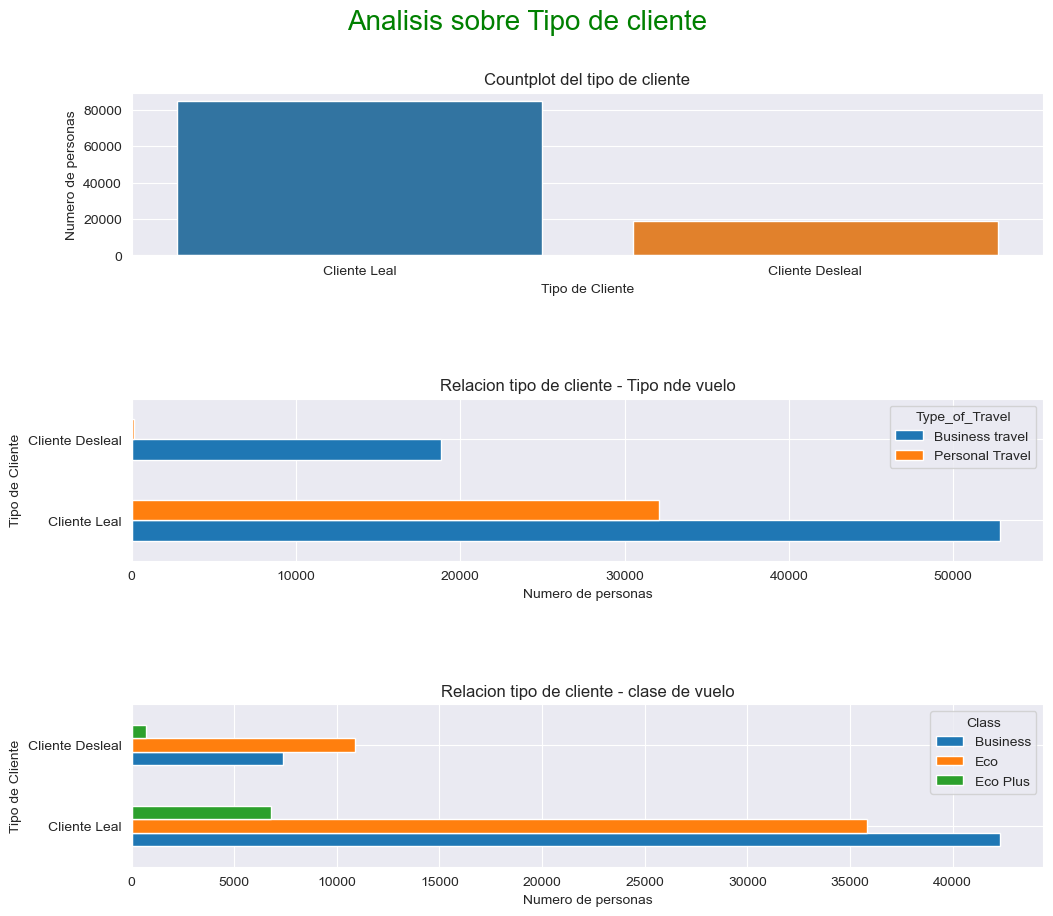

In [30]:
fig0,ax0 = plt.subplots(3,1,figsize=(12,10))

sns.countplot(x=df.Customer_Type,ax=ax0[0])
ax0[0].set_xlabel('Tipo de Cliente')
ax0[0].set_ylabel('Numero de personas')
ax0[0].set_xticks([0,1],['Cliente Leal','Cliente Desleal'])
ax0[0].set_title('Countplot del tipo de cliente')

df.groupby('Customer_Type')['Type_of_Travel'].value_counts().unstack().plot.barh(ax=ax0[1])
ax0[1].set_xlabel('Numero de personas')
ax0[1].set_ylabel('Tipo de Cliente')
ax0[1].set_yticks([0,1],['Cliente Leal','Cliente Desleal'])
ax0[1].set_yticks([0,1],['Cliente Leal','Cliente Desleal'])
ax0[1].set_title('Relacion tipo de cliente - Tipo nde vuelo')

df.groupby('Customer_Type')['Class'].value_counts().unstack().plot.barh(ax=ax0[2])
ax0[2].set_xlabel('Numero de personas')
ax0[2].set_ylabel('Tipo de Cliente')
ax0[2].set_yticks([0,1],['Cliente Leal','Cliente Desleal'])
ax0[2].set_title('Relacion tipo de cliente - clase de vuelo')

plt.tight_layout(pad=6)
fig0.suptitle('Analisis sobre Tipo de cliente',size=20,color='green')

C:\Users\Mina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Analisis de la edad')

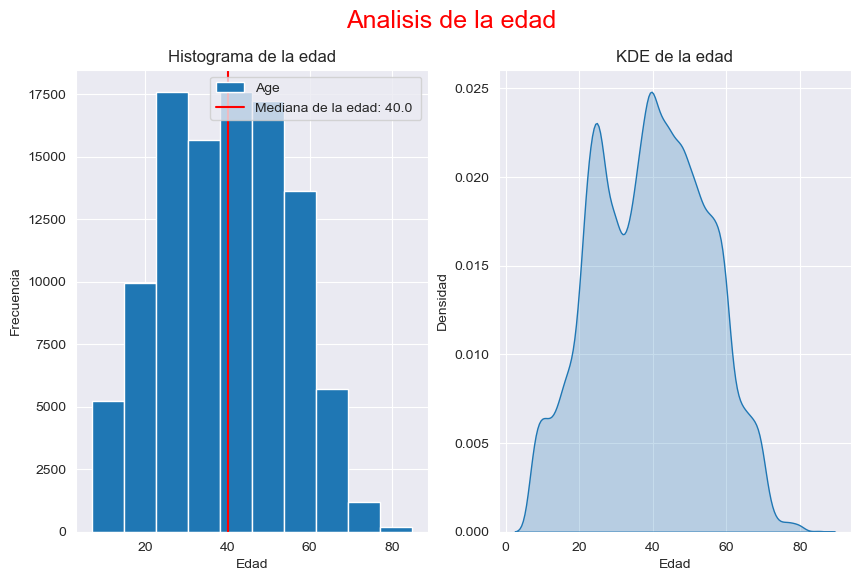

In [37]:
fig1, ax1 = plt.subplots(1,2,figsize=(10,6))
df.Age.plot.hist(ax=ax1[0])
ax1[0].set_ylabel('Frecuencia')
ax1[0].set_xlabel('Edad')
ax1[0].set_title('Histograma de la edad')
ax1[0].axvline(x=df.Age.median(),label= f'Mediana de la edad: {df.Age.median()} ',color='r')
ax1[0].legend()

sns.kdeplot(x= df.Age,ax=ax1[1],fill=True)
ax1[1].set_ylabel('Densidad')
ax1[1].set_xlabel('Edad')
ax1[1].set_title('KDE de la edad')


fig1.suptitle("Analisis de la edad",size=18,color='r')

In [28]:
age_med = [ resample(df.Age).mean() for x in range(100)]

In [27]:
age_med

[39.29850631352017,
 39.366126424391744,
 39.390138974437946,
 39.413266091777025,
 39.3458095934709]

(array([ 4.,  2., 10., 15., 20., 21., 12.,  9.,  6.,  1.]),
 array([39.26304088, 39.28757411, 39.31210733, 39.33664055, 39.36117378,
        39.385707  , 39.41024022, 39.43477344, 39.45930667, 39.48383989,
        39.50837311]),
 <BarContainer object of 10 artists>)

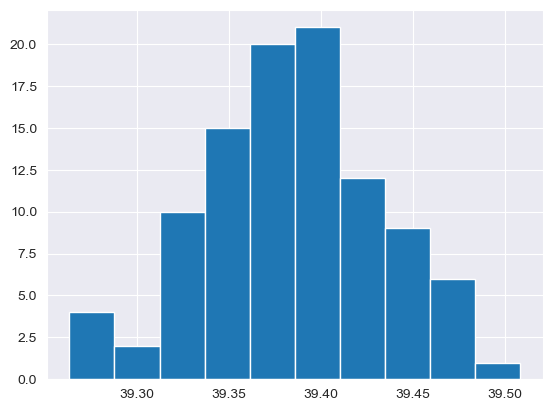

In [29]:
plt.hist(x=age_med)

Text(0.5, 0.98, 'Algunas relaciones de la edad')

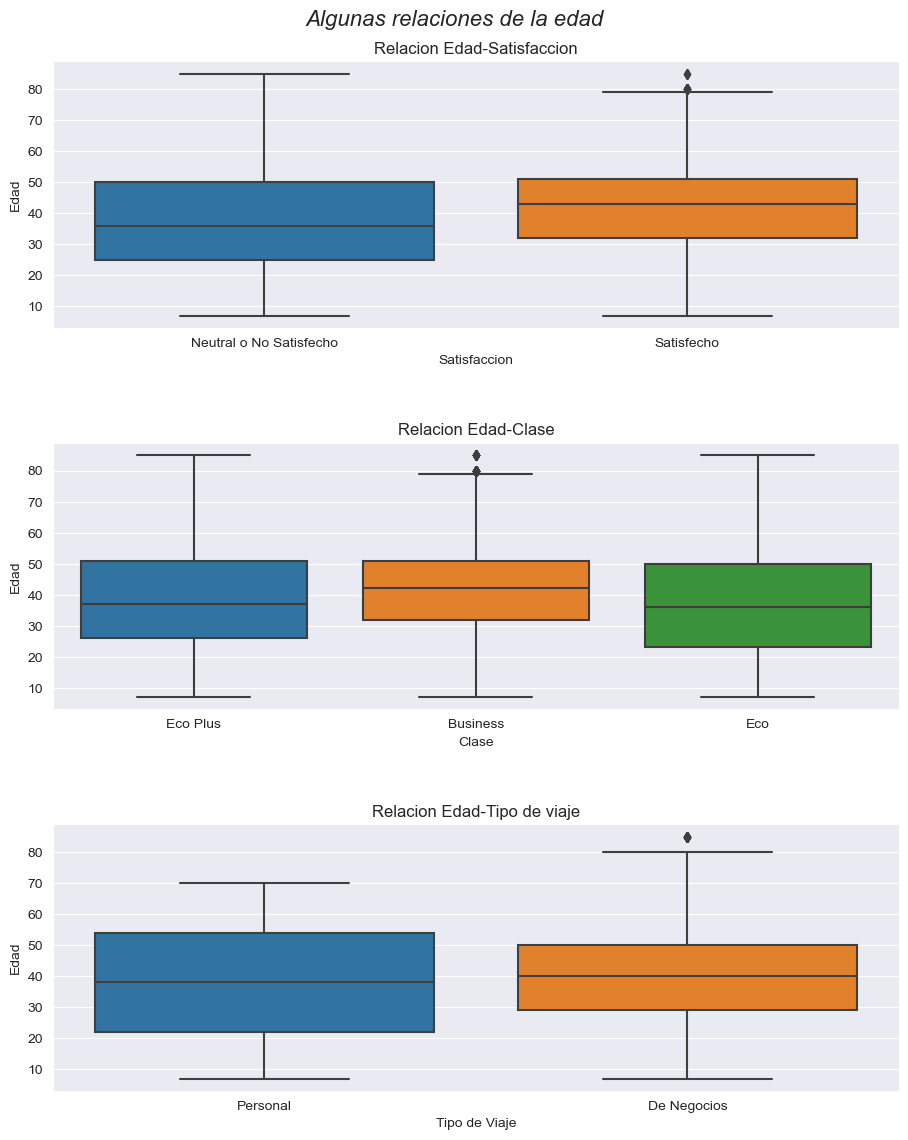

In [8]:
fig2, ax2 = plt.subplots(3,1,figsize=(10,12))

sns.boxplot(x=df.satisfaction,y=df.Age,ax=ax2[0])
ax2[0].set_ylabel('Edad')
ax2[0].set_xlabel('Satisfaccion')
ax2[0].set_xticks([0,1],['Neutral o No Satisfecho','Satisfecho'])
ax2[0].set_title('Relacion Edad-Satisfaccion')

sns.boxplot(x=df.Class,y=df.Age,ax=ax2[1])
ax2[1].set_ylabel('Edad')
ax2[1].set_xlabel('Clase')
ax2[1].set_title('Relacion Edad-Clase')

sns.boxplot(x=df.Type_of_Travel,y=df.Age,ax=ax2[2])
ax2[2].set_ylabel('Edad')
ax2[2].set_xlabel('Tipo de Viaje')
ax2[2].set_xticks([0,1],['Personal','De Negocios'])
ax2[2].set_title('Relacion Edad-Tipo de viaje')

plt.tight_layout(pad=4)
fig2.suptitle('Algunas relaciones de la edad',size=16,style='italic')

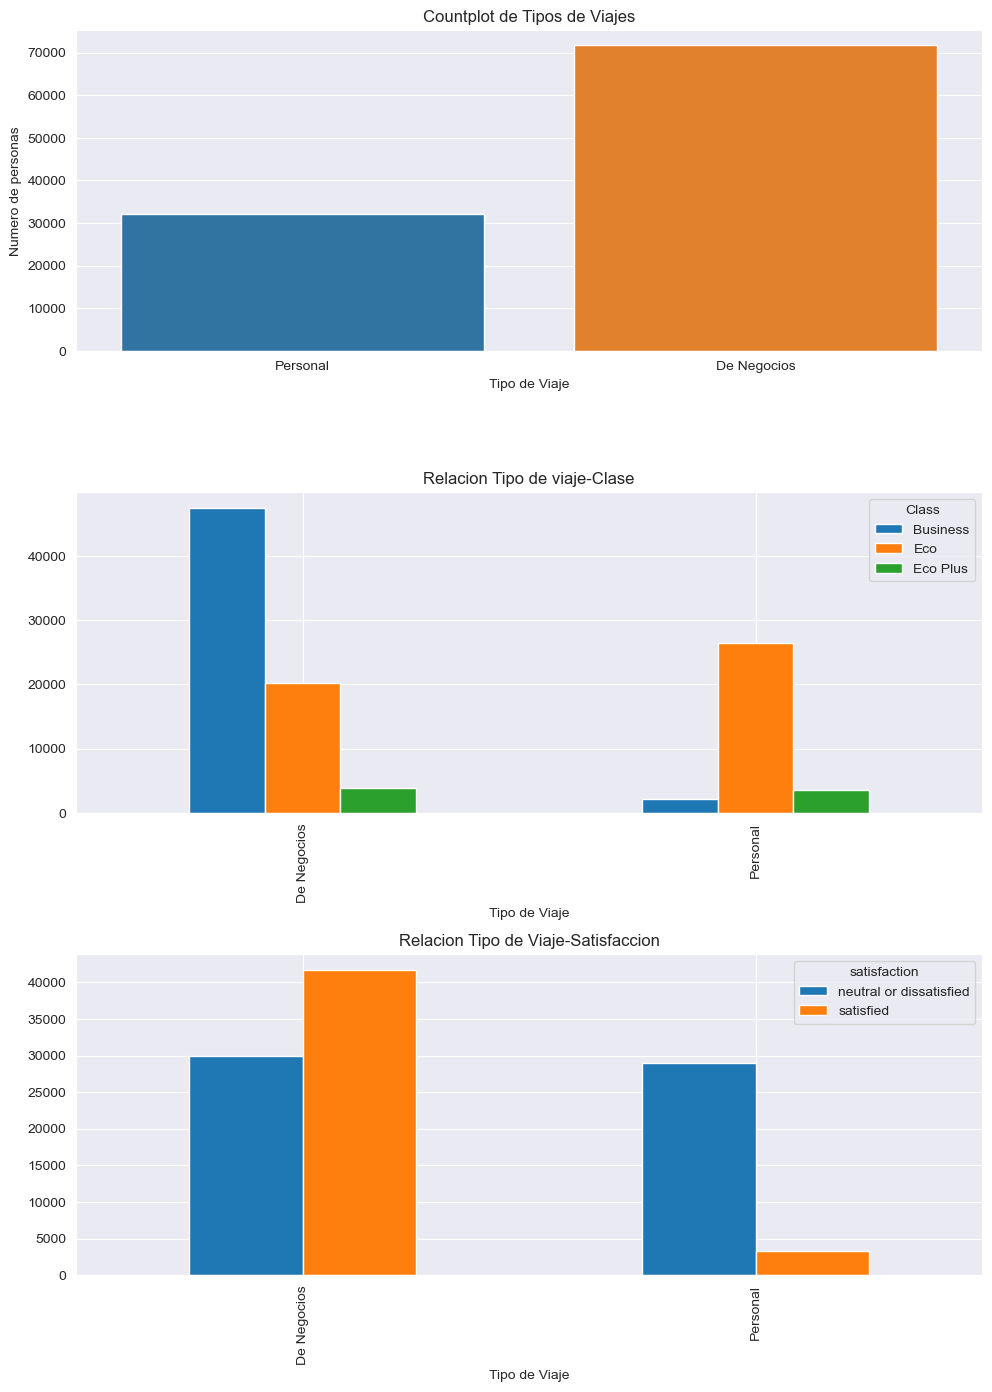

In [19]:
fig3,ax3 =plt.subplots(3,1,figsize=(10,14))

sns.countplot(x=df.Type_of_Travel,ax=ax3[0])
ax3[0].set_ylabel('Numero de personas')
ax3[0].set_xlabel('Tipo de Viaje')
ax3[0].set_xticks([0,1],['Personal','De Negocios'])
ax3[0].set_title('Countplot de Tipos de Viajes')

df.groupby('Type_of_Travel')['Class'].value_counts().unstack().plot.bar(ax=ax3[1])
ax3[1].set_xlabel('Tipo de Viaje')
ax3[1].set_xticks([0,1],['De Negocios','Personal'])
ax3[1].set_title('Relacion Tipo de viaje-Clase')

df.groupby('Type_of_Travel')['satisfaction'].value_counts().unstack().plot.bar(ax=ax3[2])
ax3[2].set_xlabel('Tipo de Viaje')
ax3[2].set_xticks([0,1],['De Negocios','Personal'])
ax3[2].set_title('Relacion Tipo de Viaje-Satisfaccion')

plt.tight_layout(pad=1)

In [6]:
labels= ['Corta','Media','Larga']
df['CDistancia_de_Viaje'] = pd.qcut(df.Flight_Distance,q=3,labels=labels)

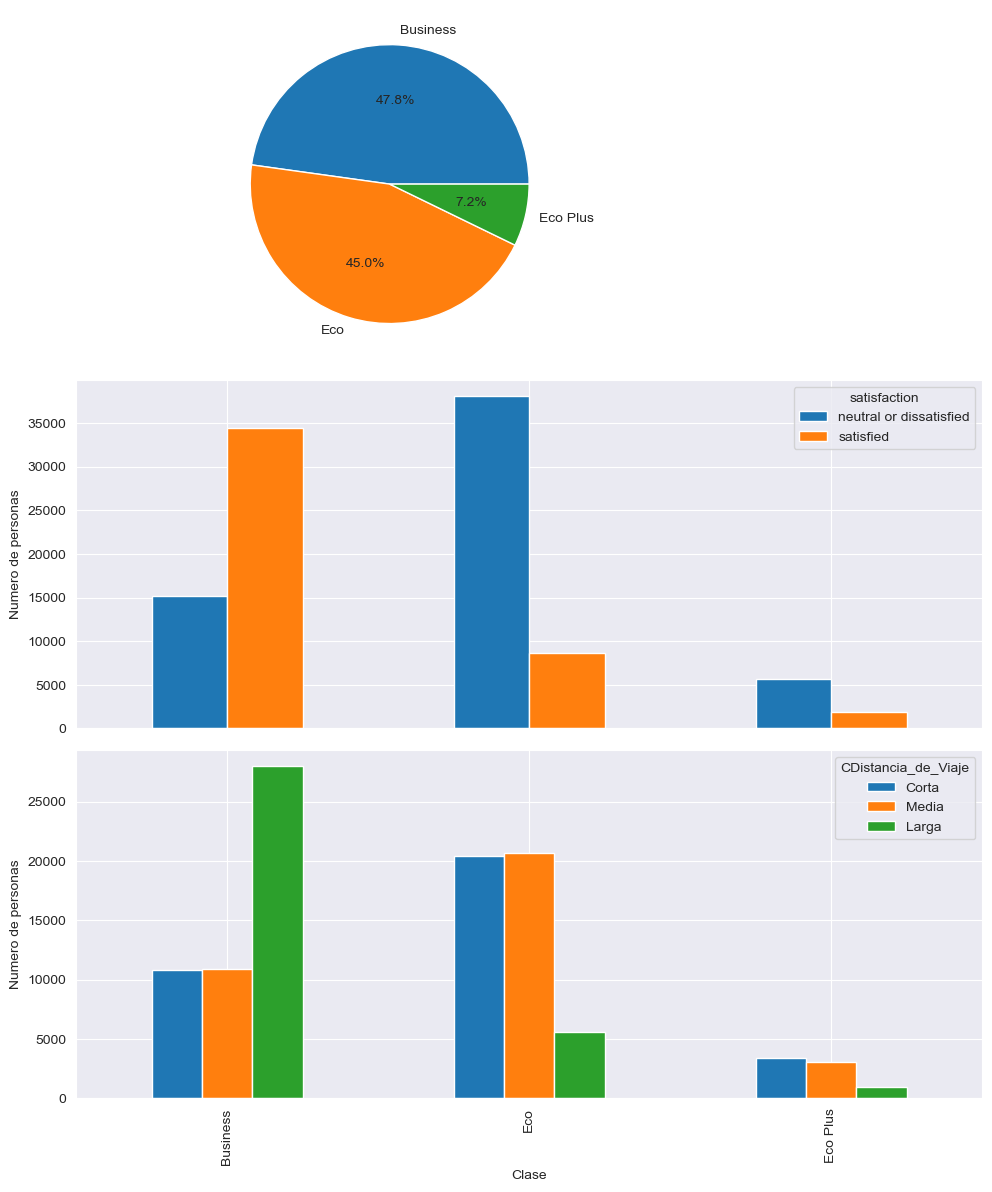

In [35]:
fig4,ax4 = plt.subplots(3,1,figsize=(10,12),sharex=True)

df.Class.value_counts().plot(kind='pie',autopct='%1.1f%%',label='Conteo',ax=ax4[0])

df.groupby('Class')['satisfaction'].value_counts().unstack().plot.bar(ax=ax4[1])
ax4[1].set_xlabel('Clase')
ax4[1].set_ylabel('Numero de personas')

df.groupby('Class')['CDistancia_de_Viaje'].value_counts().unstack().plot.bar(ax=ax4[2])
ax4[2].set_xlabel('Clase')
ax4[2].set_ylabel('Numero de personas')

plt.tight_layout(pad=1)

In [7]:
mediana_viaje = df.Flight_Distance.median()
min_viaje = df.Flight_Distance.min()
max_viaje = df.Flight_Distance.max()

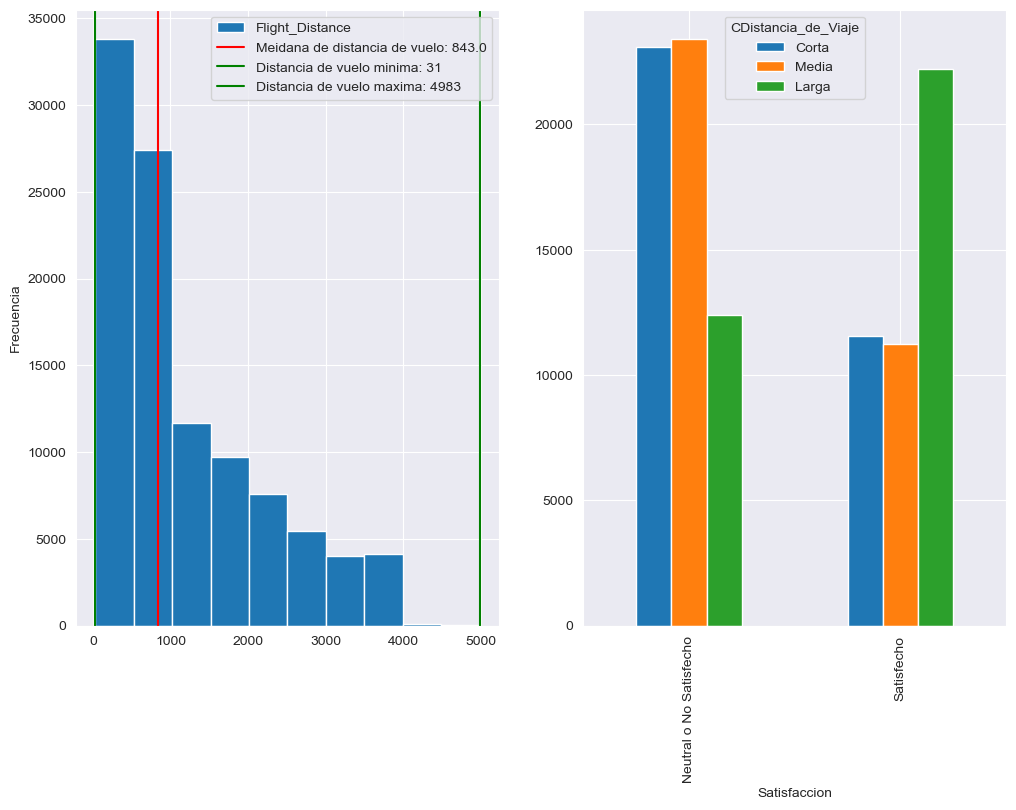

In [21]:
fig5, ax5 = plt.subplots(1,2,figsize=(12,8))

df.Flight_Distance.plot.hist(ax=ax5[0])
ax5[0].set_ylabel('Frecuencia')
ax5[0].axvline(x=mediana_viaje,label=f'Meidana de distancia de vuelo: {mediana_viaje}',color='r')
ax5[0].axvline(x=min_viaje,label=f'Distancia de vuelo minima: {min_viaje}',color='green')
ax5[0].axvline(x=max_viaje,label=f'Distancia de vuelo maxima: {max_viaje}',color='green')
ax5[0].legend()

df.groupby('satisfaction')['CDistancia_de_Viaje'].value_counts().unstack().plot(kind='bar',ax=ax5[1])
ax5[1].set_xlabel('Satisfaccion')
ax5[1].set_xticks([0,1],['Neutral o No Satisfecho','Satisfecho'])

In [37]:
dof_med = np.array([ resample(df.Flight_Distance).median() for x in range(500)])

<Figure size 1400x600 with 0 Axes>

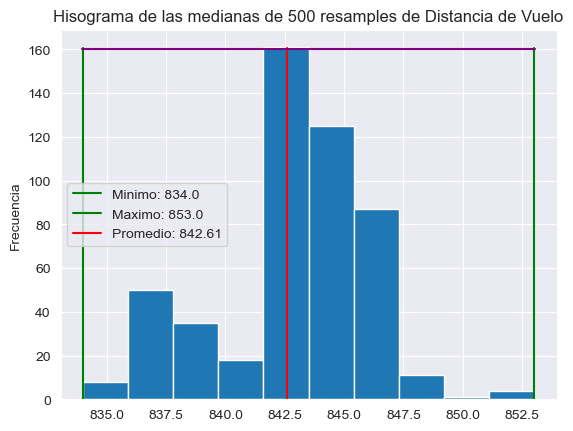

<Figure size 1400x600 with 0 Axes>

In [58]:
plt.hist(dof_med)
plt.title('Hisograma de las medianas de 500 resamples de Distancia de Vuelo')
plt.ylabel('Frecuencia')
plt.axvline(x=dof_med.min(),color='green',ymax=0.95,label=f'Minimo: {dof_med.min()}')
plt.axvline(x=dof_med.max(),color='green',ymax=0.95,label=f'Maximo: {dof_med.max()}')
plt.axvline(x=dof_med.mean(),color='r',ymax=0.95,label=f'Promedio: {dof_med.mean()}')
plt.axhline(y=160,color='purple',xmin=0.044,xmax=0.956)
plt.legend()
#plt.figure(figsize=(14,6))

### SP es el promedio de todas las puntuaciones de servicio por fila

In [47]:
df['SP'] = df.iloc[:,6:19].mean(axis=1)

Text(0.5, 1.0, 'Scatterplot relacion SP-Edad')

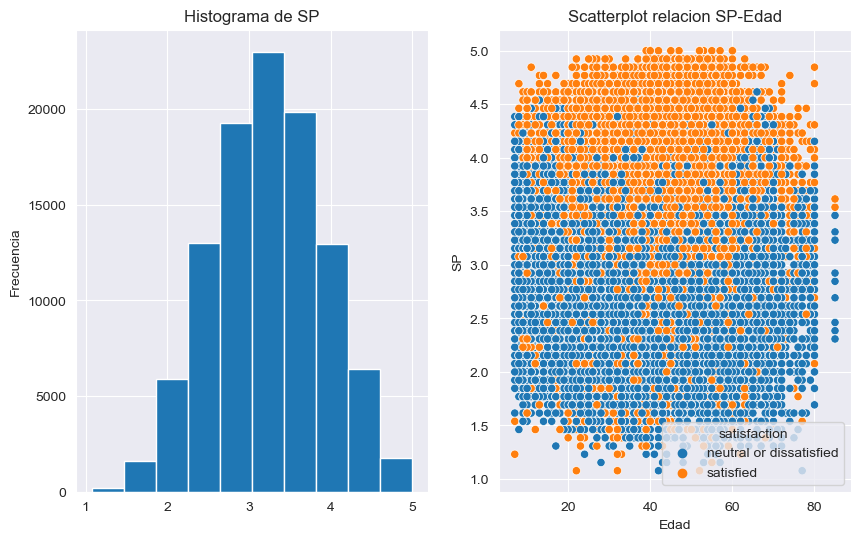

In [53]:
fig6,ax6 = plt.subplots(1,2,figsize=(10,6))

df.SP.plot.hist(ax=ax6[0])
ax6[0].set_ylabel('Frecuencia')
ax6[0].set_title('Histograma de SP')

sns.scatterplot(x=df.Age,y=df.SP,ax=ax6[1],hue=df.satisfaction)
ax6[1].set_xlabel('Edad')
ax6[1].set_title('Scatterplot relacion SP-Edad')

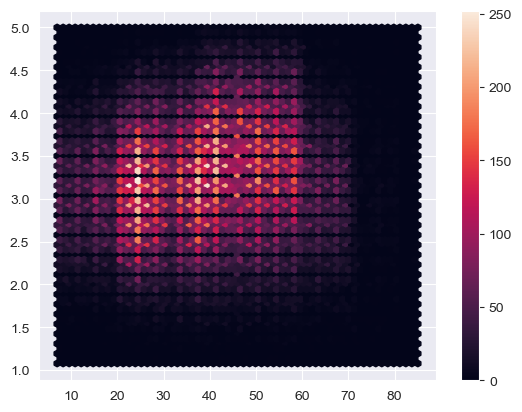

In [64]:
plt.hexbin(x=df.Age,y=df.SP,gridsize=60)
plt.colorbar()

<Axes: xlabel='satisfaction', ylabel='count'>

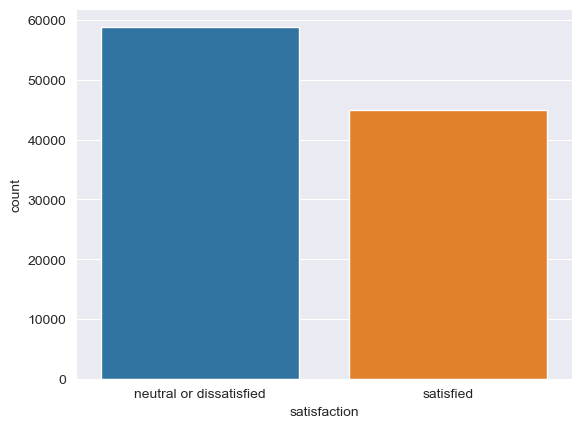

In [65]:
sns.countplot(x=df.satisfaction)

# Feature Ingeneering

<Axes: >

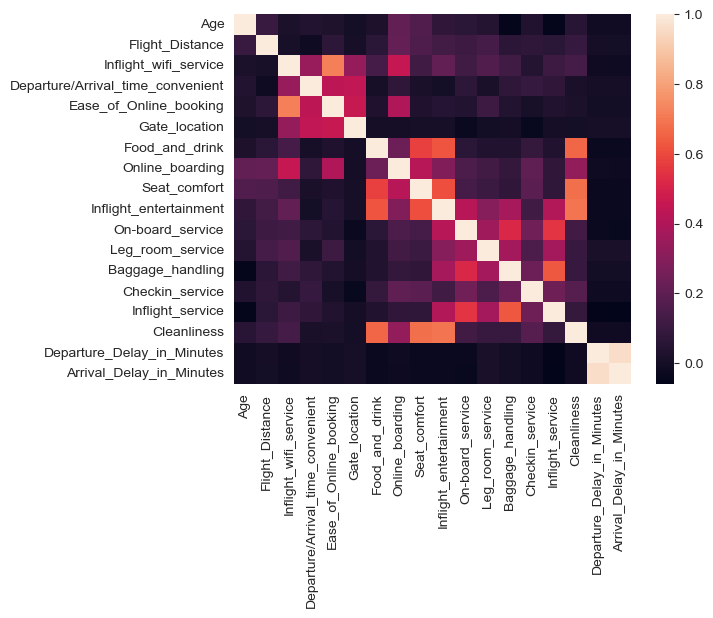

In [74]:
sns.heatmap(df.select_dtypes('number').drop('SP',axis=1).corr())

In [84]:
preparing = df.copy()
preparing = preparing.drop(['CDistancia_de_Viaje','SP'],axis=1)
preparing = pd.concat([preparing.select_dtypes('number'),pd.get_dummies(preparing.select_dtypes('object').drop('satisfaction',axis=1),dtype='int')],axis=1)

In [87]:
preparing['Satisfaction'] = df.satisfaction.replace({'neutral or dissatisfied': 0,'satisfied':1})

C:\Users\Mina\AppData\Local\Temp\ipykernel_9480\4118782142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preparing['Satisfaction'] = df.satisfaction.replace({'neutral or dissatisfied': 0,'satisfied':1})


In [88]:
preparing

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,0,1,1,0,0,1,0,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,0,1,1,0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,1,0,0,1,1,0,0,1,0,0
103900,49,2347,4,4,4,4,2,4,5,5,...,0,1,1,0,1,0,1,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,...,0,1,0,1,1,0,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,1,0,0,1,1,0,0,1,0,0


# ML

In [90]:
import sys
sys.path.append(r'D:\Programacion\Proyectos\Tools')

In [89]:
X = preparing.drop('Satisfaction',axis=1)
y = preparing.Satisfaction

## XGBClassifier

In [92]:
from mlt_class import XGBs 

In [93]:
model = XGBs(X,y)

In [94]:
model.xgbs('c')

100%|██████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: -0.9588407758231845]

Accuracy: 0.9633800105865935
Precision: 0.9689631650750341
Recall: 0.9458439684829653
F1: 0.9572639973044308
